In [1]:

import pandas as pd
import numpy as np
import random
import copy
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure


In [2]:
!git clone https://github.com/silvamq/ita 
!mv ita/meta/vns/* ./
!rm -rf ita

Cloning into 'ita'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 1), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [3]:
def distancia_entre_pontos(coordinates):
   a = coordinates
   b = a.reshape(np.prod(a.shape[:-1]), 1, a.shape[-1])
   return np.sqrt(np.einsum('ijk,ijk->ij',  b - a,  b - a)).squeeze()

def distancia_total(locations, city_tour):
    distance = 0
    for l in range(0, len(city_tour[0])):
      for k in range(0, len(city_tour[0][l])-1):
          m = k + 1        
          distance = distance + locations[city_tour[0][l][k]-1, city_tour[0][l][m]-1]  
    return distance

def solucao_initial(locations, Xdata, Ydata):
    seed = [[],float("inf")]
    sequence = random.sample(list(range(1,Xdata.shape[0]+1)), Xdata.shape[0])

    sX = len(Xdata) 
    sY = len(Ydata) 
    v = int(sX / sY)

    for d in range(0, sY):
      s = []
      s.append(sX+d+1)
      s.extend(sequence[d*v : (d+1)*v])
      s.append(sX+d+1)
      seed[0].append(s) 


    seed[1] = distancia_total(locations, seed)
    return seed


def busca_solucao(locations, Xdata, Ydata, city_tour):
    best_route = copy.deepcopy(city_tour)   
    route = []
    for t in best_route[0]:
      route.extend(t[1:-1])

    i, j  = random.sample(range(0, len(route)-1), 2)
    if (i > j):
        i, j = j, i

    route[i:j+1] = list(reversed(route[i:j+1]))  

    sX = len(Xdata) 
    sY = len(Ydata) 
    v = int(sX / sY)

    best_route[0] = []
    for d in range(0, sY):
      s = []
      s.append(sX+d+1)
      s.extend(route[d*v : (d+1)*v])
      s.append(sX+d+1)
      best_route[0].append(s) 

    best_route[1] = distancia_total(locations, best_route)                    
    return best_route

def busca_local(locations, Xdata, Ydata, city_tour, max_attempts = 50):
    count = 0
    solution = copy.deepcopy(city_tour) 
    while (count < max_attempts): 
        candidate = busca_solucao(locations, Xdata, Ydata, city_tour = solution)
        if candidate[1] < solution[1]:
            solution  = copy.deepcopy(candidate)
            count = 0
        else:
            count = count + 1                             
    return solution 

def variable_neighborhood_search(locations, Xdata, Ydata, city_tour, max_attempts = 20, neighbourhood_size = 5, iterations = 50):
    count = 0
    hist = []
    solution = copy.deepcopy(city_tour)
    best_solution = copy.deepcopy(city_tour)
    while (count < iterations):
        hist.append(best_solution[1])
        for i in range(0, neighbourhood_size):
            solution = busca_local(locations, Xdata, Ydata, city_tour = solution, max_attempts = max_attempts )
            if (solution[1] < best_solution[1]):
                best_solution = copy.deepcopy(solution) 
                break
        count = count + 1
    return [best_solution, hist]


def plot_direcoes (coordinates, city_tour, multi=False):
    for ll in range(0, len(city_tour[0])):
      xy = np.zeros((len(city_tour[0][ll]), 2))
      for i in range(0, len(city_tour[0][ll])):
          if (i < len(city_tour[0][ll])):
              xy[i, 0] = coordinates[city_tour[0][ll][i]-1, 0]
              xy[i, 1] = coordinates[city_tour[0][ll][i]-1, 1]
          else:
              xy[i, 0] = coordinates[city_tour[0][ll][0]-1, 0]
              xy[i, 1] = coordinates[city_tour[0][ll][0]-1, 1]
      plt.plot(xy[:,0], xy[:,1], marker = 's', alpha = 1, markersize = 7, color = 'black')
      plt.plot(xy[0,0], xy[0,1], marker = 's', alpha = 1, markersize = 7, color = 'red')
      if multi:
        plt.show()
    return


In [4]:
customer = pd.read_csv('customer-52.txt', sep = '\t')
customer

,x,y
0,565.0,575.0
1,25.0,185.0
2,345.0,750.0
3,945.0,685.0
4,845.0,655.0
5,880.0,660.0
6,25.0,230.0
7,525.0,1000.0
8,580.0,1175.0
9,650.0,1130.0


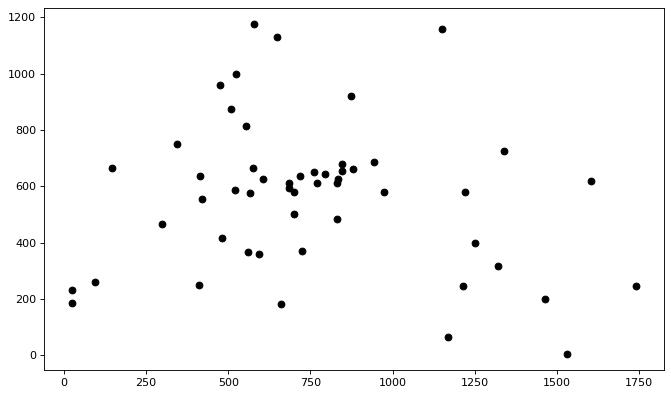

In [5]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(customer.values[:,0], customer.values[:,1], color='black')
#customer.values[:,0]

In [6]:
deposit = pd.read_csv('deposit-03.txt', sep = '\t') 
deposit

,x,y
0,1445.0,980.0
1,145.0,965.0
2,855.0,365.0


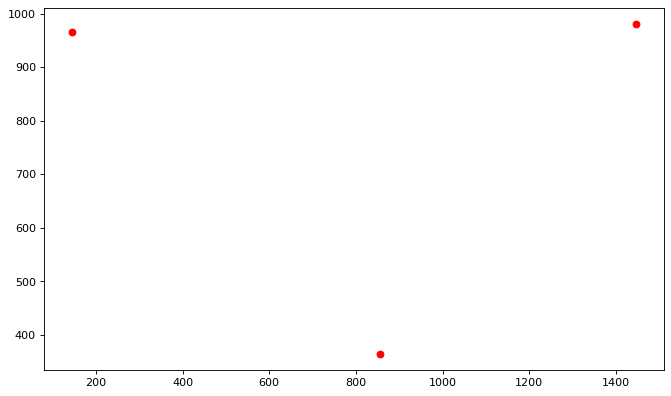

In [7]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(deposit.values[:,0], deposit.values[:,1], color='red')

In [8]:
join_data = pd.concat([customer, deposit])
join_data


,x,y
0,565.0,575.0
1,25.0,185.0
2,345.0,750.0
3,945.0,685.0
4,845.0,655.0
5,880.0,660.0
6,25.0,230.0
7,525.0,1000.0
8,580.0,1175.0
9,650.0,1130.0


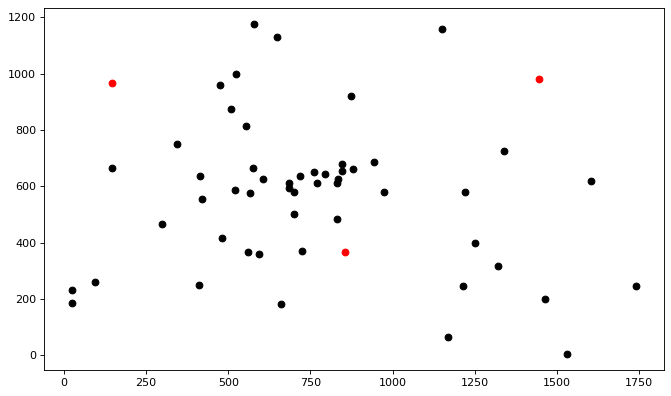

In [9]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(customer.values[:,0], customer.values[:,1], color='black')
plt.scatter(deposit.values[:,0], deposit.values[:,1], color='red')

In [10]:
locations = join_data.values
matrix_distancia = distancia_entre_pontos(locations)
pd.DataFrame(matrix_distancia)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.000000,666.108099,281.113856,395.600809,291.204396,326.266762,640.800281,426.878203,600.187471,561.471282,1040.973102,655.019084,975.000000,1120.769825,299.040131,260.048072,429.534632,161.554944,305.000000,210.059515,286.923335,46.097722,181.176709,274.590604,410.030487,728.971879,798.514245,707.000707,406.263461,360.069438,146.372812,90.553851,827.314934,135.092561,121.655251,125.000000,207.966343,240.416306,166.207701,208.925824,395.379564,565.795900,463.815696,154.434452,240.208243,279.866039,791.280608,267.301328,64.031242,217.082933,789.382670,1220.460978,968.723387,573.149195,358.050276
1,666.108099,0.000000,649.326574,1047.091209,945.145491,978.084863,45.000000,956.151139,1134.955946,1132.982789,1638.787662,1258.590481,1440.078123,1515.725899,957.823053,724.033839,494.772675,595.482997,843.400854,564.468777,392.460189,636.415745,509.828403,921.791734,1028.846441,1191.511645,1301.508740,1243.724246,635.019685,390.448460,541.225461,730.000000,1488.707493,782.080559,776.981338,785.000000,857.700414,896.939240,827.964371,869.741341,896.172416,102.591423,1123.710372,744.882541,823.286099,859.083814,1151.271037,910.302148,728.010989,596.259172,1421.557245,1716.049242,1627.398230,789.176786,849.293824
2,281.113856,649.326574,0.000000,603.510563,508.944987,542.517281,610.573501,308.058436,485.643902,487.262763,1266.688596,891.361318,1247.757989,1399.732117,504.876222,537.401154,217.313138,134.629120,207.002415,440.964851,288.530761,240.520269,361.178626,505.692594,652.533524,1005.944830,1067.637579,970.322111,651.248800,504.207299,208.925824,245.203997,903.396369,393.605132,373.664288,367.695526,447.465082,462.087654,392.237173,426.878203,246.981781,550.090902,556.596802,434.194657,219.829479,552.675312,1072.310589,504.801941,288.487435,463.249393,995.314021,1483.593610,1123.788236,293.640937,639.003130
3,395.600809,1047.091209,603.510563,0.000000,104.403065,69.641941,1026.364945,525.000000,611.003273,533.900740,663.193034,294.363721,711.073133,897.008919,100.124922,384.219989,800.249961,532.353266,474.684105,500.624610,681.487344,436.606230,537.703450,125.299641,109.201648,516.236380,526.806416,417.432629,579.870675,689.528825,540.855803,370.540146,517.349012,266.552059,275.136330,270.601183,190.394328,155.241747,230.488611,188.281704,544.541091,950.328890,245.203997,307.001629,411.096096,230.705440,659.564250,137.295302,345.253530,477.624329,397.020151,908.639092,580.538543,847.584804,332.415403
4,291.204396,945.145491,508.944987,104.403065,0.000000,35.355339,923.593525,470.558179,583.630876,513.468597,760.805494,382.426464,769.041611,944.311919,25.000000,309.232922,700.071425,430.464865,400.780489,406.601771,577.169819,332.453004,436.835209,31.622777,150.083310,552.268051,584.144674,478.591684,509.754843,594.348383,436.606230,270.185122,589.957626,163.248277,170.880075,166.207701,87.464278,50.990195,126.589889,85.146932,479.504953,847.658540,266.692707,212.249853,331.209903,170.660482,673.591122,47.434165,241.867732,386.684626,499.924994,984.441466,682.367203,765.571682,290.172363
5,326.266762,978.084863,542.517281,69.641941,35.355339,0.000000,957.039707,491.553659,596.007550,523.259018,726.102610,349.284984,744.194195,922.781122,40.311289,328.823661,735.017007,465.671558,427.931069,435.229824,611.902770,367.729520,469.068225,57.008771,124.197423,533.338542,559.128787,452.216762,528.015151,623.698645,471.831538,305.040981,568.242906,196.977156,205.548048,201.308221,120.830460,86.313383,161.941347,120.415946,504.008928,881.036322,260.048072,240.831892,360.069438,182.002747,661.910115,70.710678,277.218326,413.793427,464.569693,954.895282,649.326574,795.770067,296.057427
6,640.800281,45.000000,610.573501,1026.364945,923.593525,957.039707,0.000000,918.095856,1095.924267,1095.730350,1627.421273,1245.200787,1440.312466,1521.725994,935.360893,713.862732,451.248269,562.24994

In [11]:
matrix_cliente, matrix_deposito  = matrix_distancia[:-len(deposit)],  matrix_distancia[-len(deposit):]
solucao_initical = solucao_initial(matrix_distancia, matrix_cliente, matrix_deposito)

print(solucao_initical)


[[[53, 13, 14, 10, 29, 28, 18, 39, 44, 20, 16, 37, 5, 3, 31, 52, 47, 40, 53], [54, 42, 21, 11, 22, 8, 35, 30, 38, 50, 2, 43, 36, 24, 49, 17, 12, 15, 54], [55, 33, 45, 25, 6, 7, 23, 51, 41, 46, 1, 27, 26, 34, 4, 19, 48, 32, 55]], 30516.216637901238]


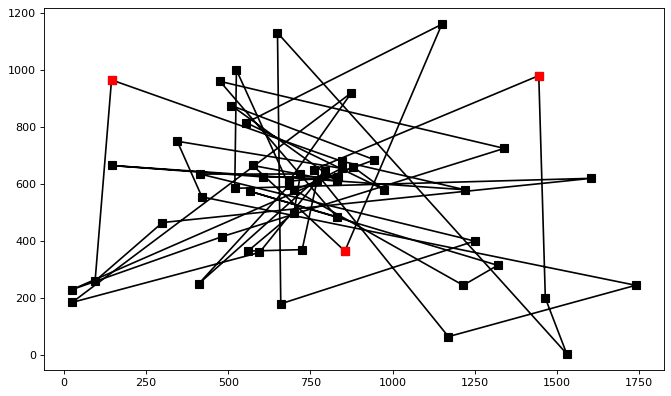

In [12]:

figure(figsize=(10, 6), dpi=80)
plot_direcoes(locations, solucao_initical)

In [13]:
nova_solucao = variable_neighborhood_search(matrix_distancia, matrix_cliente, matrix_deposito, city_tour = solucao_initical, max_attempts = 25, neighbourhood_size = 5, iterations = 50)

print(nova_solucao[0])


[[[53, 33, 43, 6, 15, 48, 5, 39, 36, 37, 46, 28, 13, 14, 11, 52, 4, 51, 53], [54, 41, 3, 49, 34, 25, 12, 27, 26, 47, 29, 16, 44, 1, 22, 31, 18, 17, 54], [55, 50, 20, 23, 30, 7, 2, 42, 21, 45, 19, 8, 10, 35, 40, 38, 24, 32, 55]], 12537.757184406197]


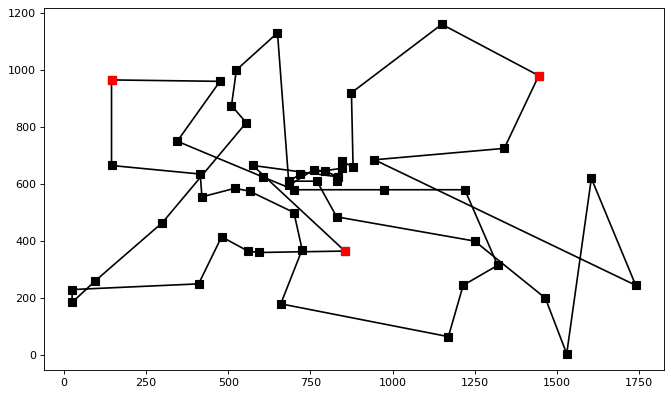

In [14]:

figure(figsize=(10, 6), dpi=80)
plot_direcoes(locations, nova_solucao[0])

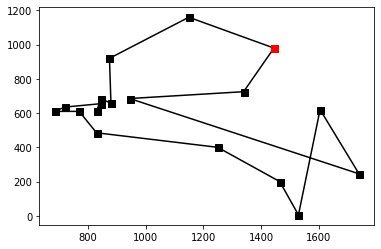

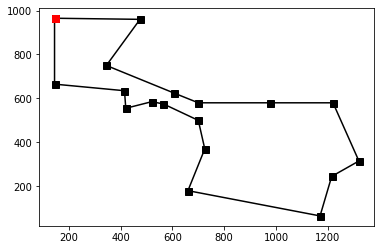

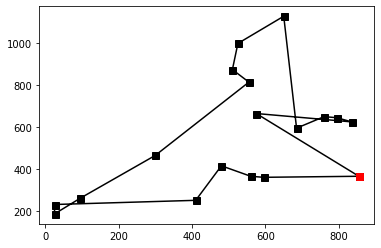

In [15]:
plot_direcoes(locations, nova_solucao[0], multi=True)

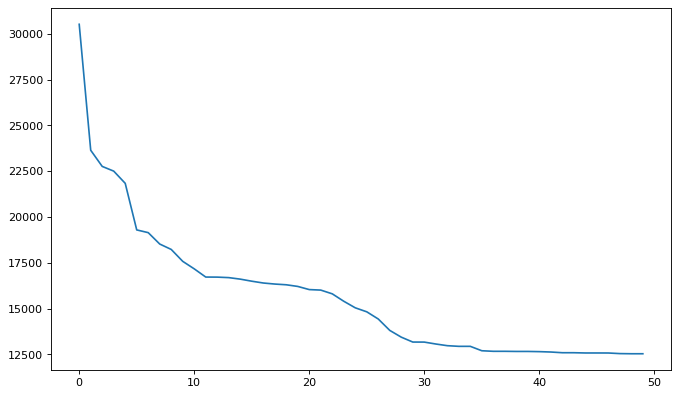

In [16]:
figure(figsize=(10, 6), dpi=80)
plt.plot(nova_solucao[1])
plt.show()